In [6]:
# Change directory to cadmesh repo until conda/pip deployment is ready
import os
os.chdir("/Users/chandu/Workspace/GM/cadmesh/")

In [8]:
# Process step files
from cadmesh import process_step_folder
results = process_step_folder(data_path="data/test", output_path="data/results/abc_sample", log_path="data/log_abc", file_pattern="*.step", file_range=[0, 10])

Processing step files:   0%|          | 0/10 [00:00<?, ?it/s]

 Errors on Reading Header Entity N0.5:HeaderSection_FileName


  0%|          | 0/10 [00:00<?, ?it/s]

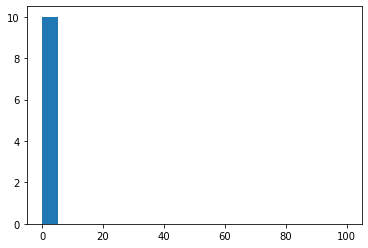

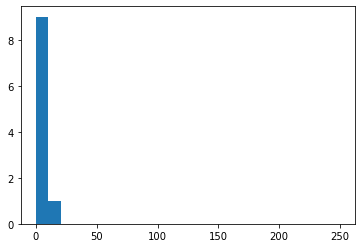

Parts: Avg: 1.40
Times: Avg: 2.00
Errors occurred: 0(total)/0(single)
Conversion errors occurred: 0(total)/0(single)
Success: 10/10


In [4]:
# Analyse log files to check how many files succeeded/failed in step processing
from cadmesh import analyse_log_files
analyse_log_files("data/log_abc/*.log")

In [4]:
# Process geometry files to find curve and surface types      
from cadmesh import analyse_curve_and_surface_types
curves, surfs, rev_ext = analyse_curve_and_surface_types("data/results/abc_00*/*_geo.yaml")

Processing geometry files:   0%|          | 0/10 [00:00<?, ?it/s]

NameError: name 'surfs' is not defined